In [2]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12559467.11it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207235.60it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3758844.82it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19176089.69it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


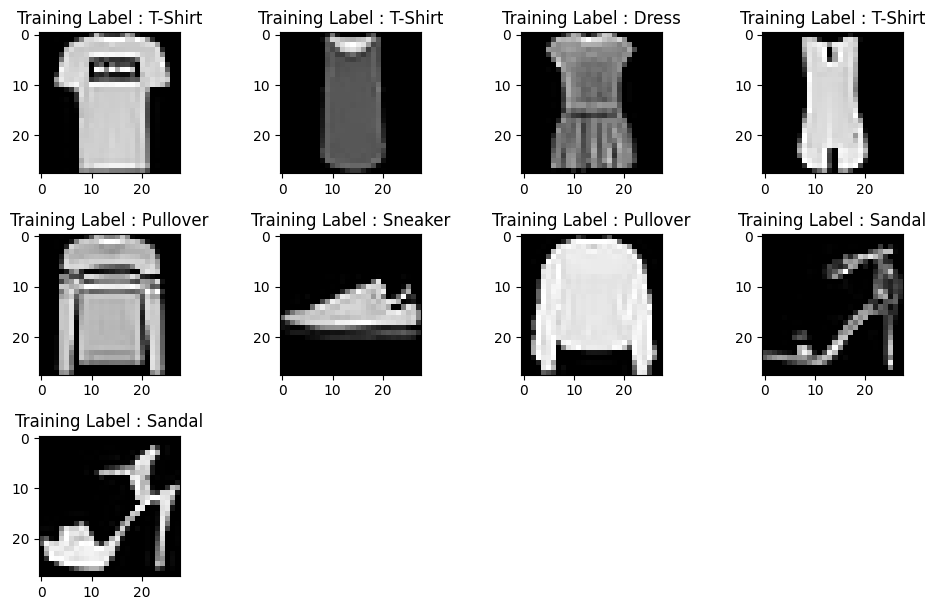

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

In [ ]:
pip install d2l==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00


## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10),
    nn.LogSoftmax(dim=1)
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=128, bias=True)
  (6): ReLU()
  (7): Linear(in_features=128, out_features=10, bias=True)
  (8): LogSoftmax(dim=1)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss =criterion(output,labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0750136550492062
Training loss: 0.5524439489536448
Training loss: 0.47196648352499454
Training loss: 0.4296065598948678
Training loss: 0.4012209500775917
Training loss: 0.37938890285265725
Training loss: 0.3608774100539527
Training loss: 0.3456109861956476
Training loss: 0.3328272200612498
Training loss: 0.3213455875370421


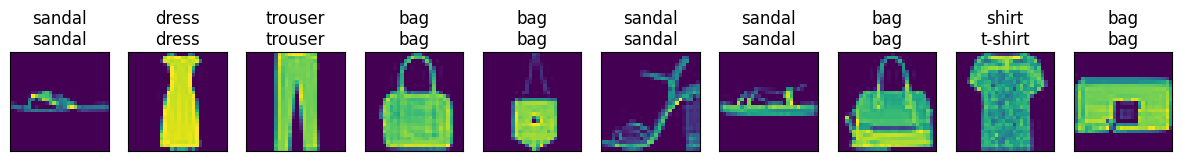

In [ ]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

## Part b

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 2048),
    nn.ReLU(),
    nn.Linear(2048, 2048),
    nn.ReLU(),
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
print(model)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=2048, bias=True)
  (4): ReLU()
  (5): Linear(in_features=2048, out_features=2048, bias=True)
  (6): ReLU()
  (7): Linear(in_features=2048, out_features=1024, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1024, out_features=256, bias=True)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=128, bias=True)
  (12): ReLU()
  (13): Linear(in_features=128, out_features=10, bias=True)
  (14): LogSoftmax(dim=1)
)


In [ ]:
epochs = 30

train_losses = []
test_losses = []
test_accuracies = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)

        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                output = model(images)
                test_loss += criterion(output, labels).item()
                ps = torch.exp(output)
                top_p, top_class = ps.max(dim=1)
                equals = top_class == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()
        test_loss /= len(testloader)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy / len(testloader))

        print(f"Epoch: {e+1} - Training loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {accuracy/len(testloader):.4f}")

Epoch: 1 - Training loss: 2.2321, Test loss: 1.7385, Test accuracy: 0.4068
Epoch: 2 - Training loss: 0.9960, Test loss: 0.7891, Test accuracy: 0.7118
Epoch: 3 - Training loss: 0.7038, Test loss: 0.7338, Test accuracy: 0.7366
Epoch: 4 - Training loss: 0.5540, Test loss: 0.5504, Test accuracy: 0.8016
Epoch: 5 - Training loss: 0.4662, Test loss: 0.4846, Test accuracy: 0.8252
Epoch: 6 - Training loss: 0.4129, Test loss: 0.5403, Test accuracy: 0.8073
Epoch: 7 - Training loss: 0.3781, Test loss: 0.4354, Test accuracy: 0.8399
Epoch: 8 - Training loss: 0.3520, Test loss: 0.4915, Test accuracy: 0.8247
Epoch: 9 - Training loss: 0.3335, Test loss: 0.4099, Test accuracy: 0.8424
Epoch: 10 - Training loss: 0.3161, Test loss: 0.4158, Test accuracy: 0.8489
Epoch: 11 - Training loss: 0.3010, Test loss: 0.3760, Test accuracy: 0.8640
Epoch: 12 - Training loss: 0.2871, Test loss: 0.4078, Test accuracy: 0.8571
Epoch: 13 - Training loss: 0.2735, Test loss: 0.4200, Test accuracy: 0.8486
Epoch: 14 - Training 

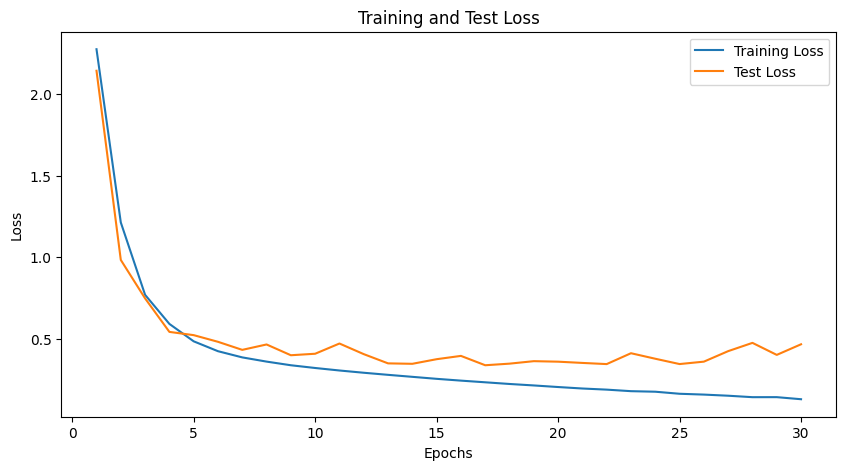

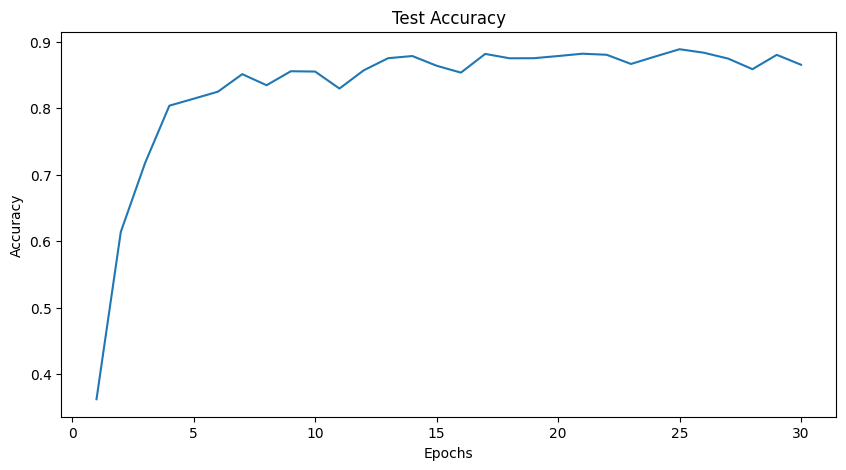

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

## Part c

In [3]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 2048),
    nn.ReLU(),
    nn.Linear(2048, 2048),
    nn.ReLU(),
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [5]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=2048, bias=True)
  (4): ReLU()
  (5): Linear(in_features=2048, out_features=2048, bias=True)
  (6): ReLU()
  (7): Linear(in_features=2048, out_features=1024, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1024, out_features=256, bias=True)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=128, bias=True)
  (12): ReLU()
  (13): Linear(in_features=128, out_features=10, bias=True)
  (14): LogSoftmax(dim=1)
)


In [6]:
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomCrop(size=28, padding=4),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor()
])

In [7]:
# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15158644.94it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 291003.40it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5006812.05it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14609118.40it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [8]:

epochs = 30

train_losses = []
test_losses = []
test_accuracies = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)

        # Evaluate on test data
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                output = model(images)
                test_loss += criterion(output, labels).item()
                ps = torch.exp(output)
                top_p, top_class = ps.max(dim=1)
                equals = top_class == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()
        test_loss /= len(testloader)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy / len(testloader))

        print(f"Epoch: {e+1} - Training loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {accuracy/len(testloader):.4f}")

Epoch: 1 - Training loss: 2.3025, Test loss: 2.3015, Test accuracy: 0.0998
Epoch: 2 - Training loss: 2.3007, Test loss: 2.2994, Test accuracy: 0.1606
Epoch: 3 - Training loss: 2.2970, Test loss: 2.2926, Test accuracy: 0.2239
Epoch: 4 - Training loss: 2.2684, Test loss: 2.1965, Test accuracy: 0.1929
Epoch: 5 - Training loss: 1.8840, Test loss: 1.5910, Test accuracy: 0.3557
Epoch: 6 - Training loss: 1.4638, Test loss: 1.3976, Test accuracy: 0.4334
Epoch: 7 - Training loss: 1.3419, Test loss: 1.3004, Test accuracy: 0.4764
Epoch: 8 - Training loss: 1.2699, Test loss: 1.2286, Test accuracy: 0.5043
Epoch: 9 - Training loss: 1.1828, Test loss: 1.1317, Test accuracy: 0.5564
Epoch: 10 - Training loss: 1.0908, Test loss: 1.0356, Test accuracy: 0.6029
Epoch: 11 - Training loss: 1.0061, Test loss: 0.9678, Test accuracy: 0.6341
Epoch: 12 - Training loss: 0.9466, Test loss: 0.9842, Test accuracy: 0.6348
Epoch: 13 - Training loss: 0.9004, Test loss: 0.9710, Test accuracy: 0.6415
Epoch: 14 - Training 

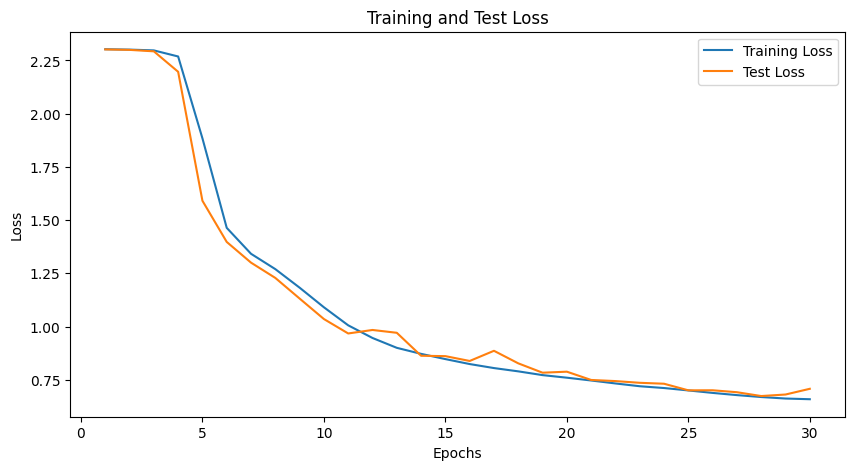

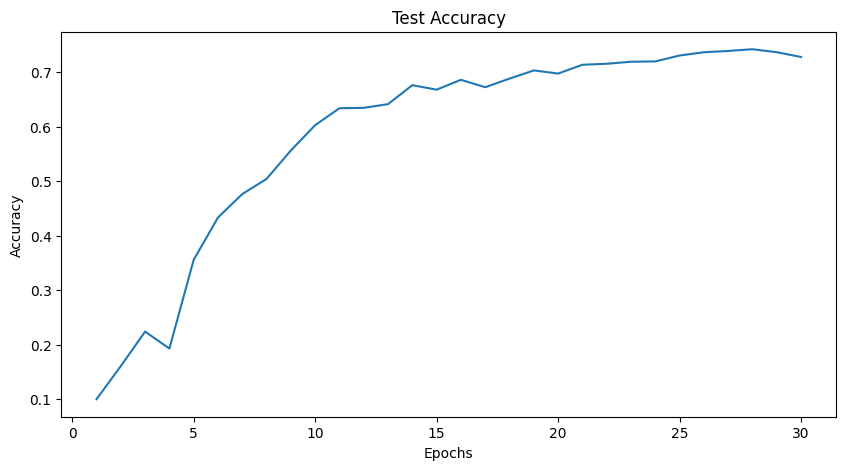

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()


**part D**



**answer**

In [4]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1024),
    nn.ReLU(),
    nn.Linear(1024, 2048),
    nn.ReLU(),
    nn.Linear(2048, 2048),
    nn.ReLU(),
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Linear(1024, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.005)

In [8]:
epochs = 20
train_losses = []
test_losses = []
test_accuracies = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                output = model(images)
                test_loss += criterion(output, labels).item()
                ps = torch.exp(output)
                top_p, top_class = ps.max(dim=1)
                equals = top_class == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        test_loss /= len(testloader)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy / len(testloader))
        print(f"Epoch: {e+1} - Training loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {accuracy/len(testloader):.4f}")


Epoch: 1 - Training loss: 2.1577, Test loss: 1.5134, Test accuracy: 0.4362
Epoch: 2 - Training loss: 0.9975, Test loss: 0.9033, Test accuracy: 0.6588
Epoch: 3 - Training loss: 0.7222, Test loss: 0.6612, Test accuracy: 0.7426
Epoch: 4 - Training loss: 0.5953, Test loss: 0.6201, Test accuracy: 0.7739
Epoch: 5 - Training loss: 0.5271, Test loss: 0.5809, Test accuracy: 0.7840
Epoch: 6 - Training loss: 0.4854, Test loss: 0.4864, Test accuracy: 0.8302
Epoch: 7 - Training loss: 0.4463, Test loss: 0.8235, Test accuracy: 0.7004
Epoch: 8 - Training loss: 0.4186, Test loss: 0.4886, Test accuracy: 0.8277
Epoch: 9 - Training loss: 0.3942, Test loss: 0.4392, Test accuracy: 0.8467
Epoch: 10 - Training loss: 0.3774, Test loss: 0.4420, Test accuracy: 0.8407
Epoch: 11 - Training loss: 0.3611, Test loss: 0.4061, Test accuracy: 0.8557
Epoch: 12 - Training loss: 0.3489, Test loss: 0.3857, Test accuracy: 0.8641
Epoch: 13 - Training loss: 0.3359, Test loss: 0.3992, Test accuracy: 0.8606
Epoch: 14 - Training 

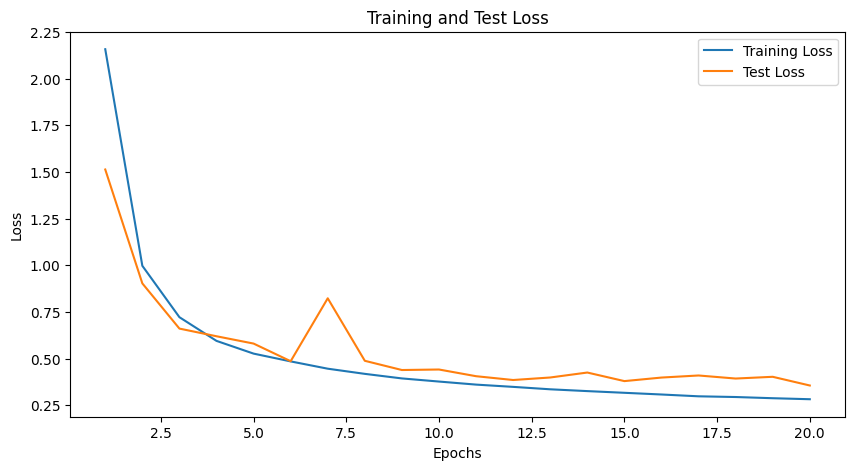

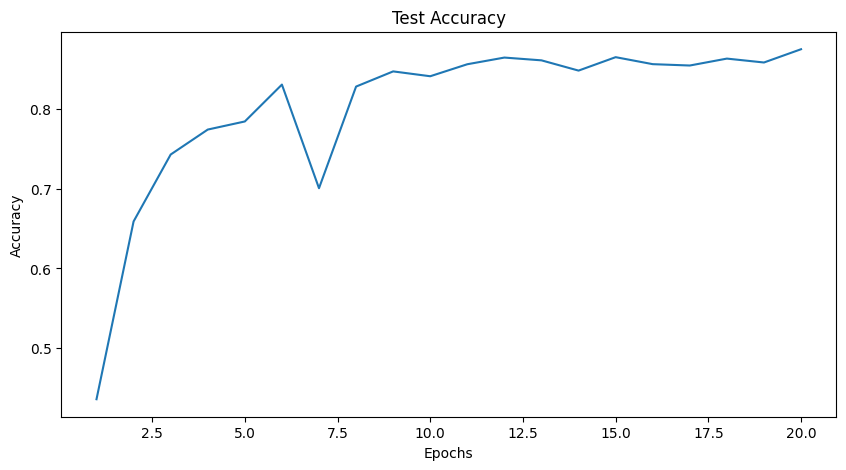

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()